# Assignment 6
## Machine Learning - ITE-5310
### Humber College - November 2022
#### Name: Nguyen Anh Tuan Le
#### Student ID: N014141295

### import important packages

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

### figure size in inches

In [155]:
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

### Load dataset

In [156]:
data = pd.read_csv("pima_indians_diabetes.csv")

### show sample of the database

In [157]:
data.sample(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


### show columns

In [158]:
data.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

### split data into input and target variable(s)

In [159]:
X = data.drop("class", axis=1)
y = data["class"]

### standardize the dataset

In [160]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### split into train and test set

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

### create the classifier

In [162]:
classifier = RandomForestClassifier(n_estimators=100)

### Train the model using the training sets

In [163]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

### prediction on the test set

In [164]:
y_pred = classifier.predict(X_test)

### Calculate Model Accuracy

In [165]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


### 80.5% of accuracy is quite good but can be improved

### check Important features

In [166]:
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

### Display

In [167]:
feature_importances_df

,feature,importance
1,plasma_concentration,0.265153
5,bmi,0.152950
7,age,0.142551
6,diabetes_pedigree,0.120932
2,diastolic_blood_pressure,0.083460
0,time_pregnant_no,0.082878
4,serum_insulin,0.078441
3,triceps_skinfold_thickness,0.073634


### visualize important features

### Creating a bar plot

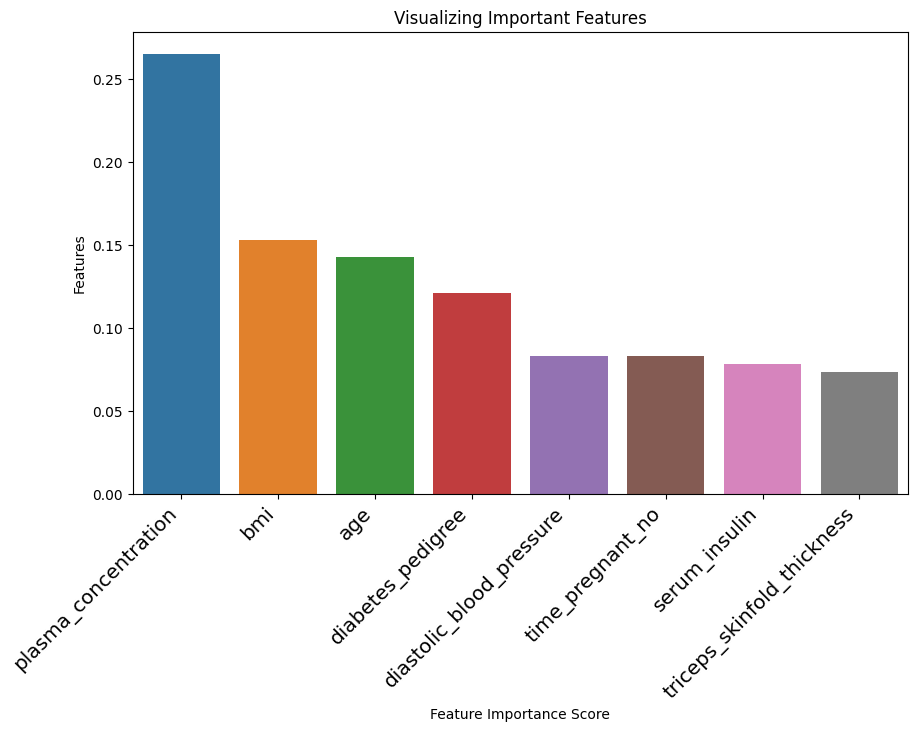

In [168]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

# add labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

### load data with selected features (the triceps_skinfold_thickness feature has low importance and does not contribute much to the prediction => drop it)

In [169]:
X = data.drop(["class", "triceps_skinfold_thickness"], axis=1)
y = data["class"]

### standardize the dataset

In [170]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### split into train and test set

In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

### Create a Random Classifier

In [172]:
clf = RandomForestClassifier(n_estimators=100)

### Train the model using the training sets

In [173]:
clf.fit(X_train, y_train)

RandomForestClassifier()

### prediction on test set

In [174]:
y_pred = clf.predict(X_test)

### Calculate Model Accuracy,

In [175]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8181818181818182


### the accuracy has been improved from 80.5% to 81.8% by dropping one unnecessary column (triceps_skinfold_thickness)

### try to improve with bagging

In [176]:
from sklearn.ensemble import BaggingClassifier
X = data.drop(["class", "triceps_skinfold_thickness"], axis=1)
y = data["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

clf = RandomForestClassifier(n_estimators=100)

bagging_model = BaggingClassifier(clf, n_estimators=100)

bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8051948051948052


### after adding bagging, it does not improve the accuracy, and it decreases the accuracy right back to before dropping triceps_skinfold_thickness column